#### main

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime

#### stacked bar chart and pie chart

In [ ]:
# look at spread of hdb dwelling units first
# see if we can take 4-room units as identifier only

In [97]:
# increase the view of numpy array output view
np.set_printoptions(threshold=sys.maxsize)

In [145]:
population_data = np.loadtxt("dwelling-units-under-hdbs-management-by-town-and-flat-type.csv",
                             delimiter=',', skiprows=1, dtype=[('financial_year','U50'),
                                                              ('town_or_estate','U50'),
                                                              ('flat_type','U50'),
                                                              ('sold_or_rental','U50'),
                                                              ('no_of_dwelling_units','i8')])

In [146]:
# only consider sold units 
# only sold units are linked to resale prices
population_data2 = population_data[[i for i, v in enumerate(population_data['sold_or_rental']) if 'Sold Units' in v]]

In [221]:
names = ['financial_year', 'flat_type', 'no_of_dwelling_units']
formats = ['<U50', '<U50', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
population_data0 = np.empty((0,), dtype=dtype)

for x in np.unique(population_data2['financial_year']):
    population_data3 = population_data2[[i for i, v in enumerate(population_data2['financial_year']) if x in v]]
    for y in np.unique(population_data3['flat_type']):
        z = population_data3[[m for m, n in enumerate(population_data3['flat_type']) if y in n]]['no_of_dwelling_units'].sum()
        population_data0 = np.append(population_data0, np.array([tuple((x,y,z))], dtype=population_data0.dtype), axis=0)

population_data0

array([('2008', '1-room',    258), ('2008', '2-room',   6240),
       ('2008', '3-room', 217398), ('2008', '4-room', 336739),
       ('2008', '5-room', 209069), ('2008', 'Executive',  65075),
       ('2008', 'HUDC',   1865), ('2008', 'Studio Apartment',   1239),
       ('2009', '1-room',    258), ('2009', '2-room',   6630),
       ('2009', '3-room', 218056), ('2009', '4-room', 339790),
       ('2009', '5-room', 209765), ('2009', 'Executive',  65077),
       ('2009', 'HUDC',   1865), ('2009', 'Studio Apartment',   1239),
       ('2010', '1-room',    258), ('2010', '2-room',   7270),
       ('2010', '3-room', 219809), ('2010', '4-room', 346661),
       ('2010', '5-room', 211034), ('2010', 'Executive',  65075),
       ('2010', 'HUDC',   1865), ('2010', 'Studio Apartment',   1800),
       ('2011', '1-room',    258), ('2011', '2-room',   8174),
       ('2011', '3-room', 220111), ('2011', '4-room', 354668),
       ('2011', '5-room', 213321), ('2011', 'Executive',  65076),
       ('2011', 'HU

In [246]:
# HUDC no longer available from 2014-2018
for x in np.arange(2014,2019,1):
    population_data0 = np.append(population_data0, np.array([tuple((str(x),'HUDC',0))], dtype=dtype), axis=0)

In [247]:
d = {}
for n in np.unique(population_data0['flat_type']):
    d['list{}'.format(n)] = population_data0[[i for i, v in enumerate(population_data0['flat_type']) if n in v]]['no_of_dwelling_units']
    
d 

{'list1-room': array([258, 258, 258, 258, 258, 258, 255, 255, 255, 600, 255], dtype=int64),
 'list2-room': array([ 6240,  6630,  7270,  8174,  9806, 10981, 11995, 13045, 14239,
        19345, 22964], dtype=int64),
 'list3-room': array([217398, 218056, 219809, 220111, 220695, 222357, 226972, 230558,
        234659, 239092, 240792], dtype=int64),
 'list4-room': array([336739, 339790, 346661, 354668, 357667, 366245, 379687, 390790,
        401659, 413641, 419535], dtype=int64),
 'list5-room': array([209069, 209765, 211034, 213321, 214798, 217553, 224402, 229829,
        235089, 239972, 241572], dtype=int64),
 'listExecutive': array([65075, 65077, 65075, 65076, 65078, 65075, 65079, 65082, 65085,
        65091, 65102], dtype=int64),
 'listHUDC': array([1865, 1865, 1865, 1535, 1177, 1177,    0,    0,    0,    0,    0],
       dtype=int64),
 'listStudio Apartment': array([1239, 1239, 1800, 2250, 2932, 4588, 7078, 7782, 8530, 8980, 8978],
       dtype=int64)}

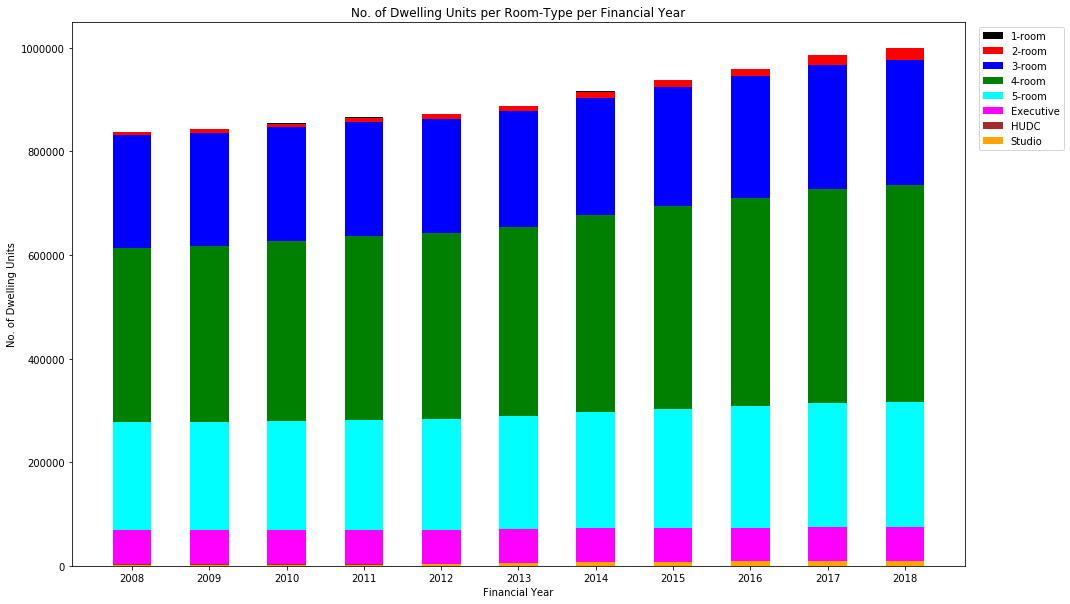

In [867]:
fig1 = plt.figure(figsize=(16,10))

plt.bar(np.unique(population_data0['financial_year']), d['list1-room'], width=0.5, label='1-room', color='black', bottom=d['list2-room']+d['list3-room']+d['list4-room']+d['list5-room']+d['listExecutive']+d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['list2-room'], width=0.5, label='2-room', color='red', bottom=d['list3-room']+d['list4-room']+d['list5-room']+d['listExecutive']+d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['list3-room'], width=0.5, label='3-room', color='blue', bottom=d['list4-room']+d['list5-room']+d['listExecutive']+d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['list4-room'], width=0.5, label='4-room', color='green', bottom=d['list5-room']+d['listExecutive']+d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['list5-room'], width=0.5, label='5-room', color='cyan', bottom=d['listExecutive']+d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['listExecutive'], width=0.5, label='Executive', color='magenta', bottom=d['listHUDC']+d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['listHUDC'], width=0.5, label='HUDC', color='brown', bottom=d['listStudio Apartment'])
plt.bar(np.unique(population_data0['financial_year']), d['listStudio Apartment'], width=0.5, label='Studio', color='orange')

plt.ylabel('No. of Dwelling Units')
plt.xlabel('Financial Year')
plt.legend(loc="upper left", bbox_to_anchor=(1.01, 1))
plt.title('No. of Dwelling Units per Room-Type per Financial Year')
plt.show()

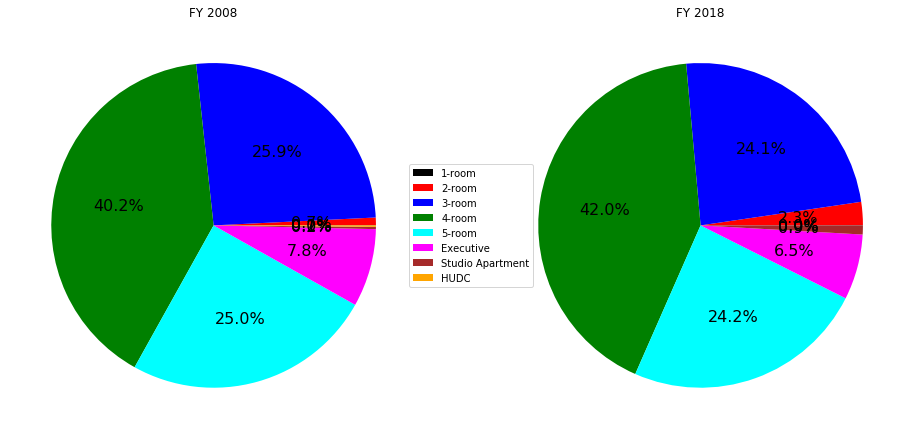

In [868]:
# compare 2008 and 2018 - 10 years difference
population_data2008 = population_data0[population_data0['financial_year']=='2008']
values2008 = population_data2008['no_of_dwelling_units']
percent2008 = 100.*values2008/values2008.sum()
labels2008 = population_data2008['flat_type']
labels2008a = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels2008, percent2008)]

population_data2018 = population_data0[population_data0['financial_year']=='2018']
values2018 = population_data2018['no_of_dwelling_units']
percent2018 = 100.*values2018/values2018.sum()
labels2018 = population_data2018['flat_type']
labels2018a = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels2018, percent2018)]

plt.figure(figsize=(16,10))
colors = ['black','red','blue','green','cyan','magenta','brown','orange']
plt.subplot(121)
p1 = plt.pie(values2008, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16})
# plt.legend(p1, labels2008a, loc='center left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.title('FY 2008')
plt.subplot(122)
p2 = plt.pie(values2018, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16})
plt.legend(labels2018, loc='center right', bbox_to_anchor=(0.1, 0.5))
plt.title('FY 2018')
plt.show()

#### line chart and horizontal bar chart

In [ ]:
# median-resale-prices-for-registered-applications-by-town-and-flat-type.csv
# look at resale prices at each town and flat type

In [3]:
# need to generate datetime from given quarter
# file is in class bytes, not string, so need to decode with ascii
# because its written as Q form, theres a need to rewrite quarter into month form
# function to be used in converter argument in np.genfromtxt

def parsetime(x):
    if int(x.decode('ascii')[-1])<4:
        return datetime.strptime(str(x.decode('ascii')[:-2])+'0'+str((3*int(x.decode('ascii')[-1]))-2), '%Y-%m')
    else:
        return datetime.strptime(str(x.decode('ascii')[:-2])+str((3*int(x.decode('ascii')[-1]))-2), '%Y-%m')

In [873]:
# using genfromtxt simpler than loadtxt, because of missing values
# need to use converters to convert byte form quarter date into actual datetime in form of months
# note the use of string in dtype as U50

data = np.genfromtxt("median-resale-prices-for-registered-applications-by-town-and-flat-type.csv",
                 delimiter=',', skip_header=1, dtype=[('quarter','datetime64[M]'),
                                                       ('town','U50'),
                                                       ('flat_type','U50'),
                                                       ('price','i8')], 
                 missing_values=['na','-'], filling_values=0, converters={0: parsetime})

In [874]:
# convert strings to upper case for uniformity
for x in data:
    for i, y in enumerate(x):
        if isinstance(y, str):
            x[i] = y.upper()

In [875]:
data2 = data[[i for i, v in enumerate(data['flat_type']) if '4-ROOM' in v]]
data2

array([('2007-04', 'ANG MO KIO', '4-ROOM', 260000),
       ('2007-04', 'BEDOK', '4-ROOM', 224500),
       ('2007-04', 'BISHAN', '4-ROOM', 311500),
       ('2007-04', 'BUKIT BATOK', '4-ROOM', 234000),
       ('2007-04', 'BUKIT MERAH', '4-ROOM', 371000),
       ('2007-04', 'BUKIT PANJANG', '4-ROOM', 220500),
       ('2007-04', 'BUKIT TIMAH', '4-ROOM',      0),
       ('2007-04', 'CENTRAL', '4-ROOM', 341000),
       ('2007-04', 'CHOA CHU KANG', '4-ROOM', 232000),
       ('2007-04', 'CLEMENTI', '4-ROOM', 302200),
       ('2007-04', 'GEYLANG', '4-ROOM', 265000),
       ('2007-04', 'HOUGANG', '4-ROOM', 235000),
       ('2007-04', 'JURONG EAST', '4-ROOM', 237000),
       ('2007-04', 'JURONG WEST', '4-ROOM', 223000),
       ('2007-04', 'KALLANG/WHAMPOA', '4-ROOM', 295000),
       ('2007-04', 'MARINE PARADE', '4-ROOM',      0),
       ('2007-04', 'PASIR RIS', '4-ROOM', 245000),
       ('2007-04', 'PUNGGOL', '4-ROOM', 252500),
       ('2007-04', 'QUEENSTOWN', '4-ROOM', 388000),
       ('2007-04'

In [386]:
# there are some 0 values in the arrays, some quarters may have 0
# to fill 0 value with previous value
def fill_zeros_with_last(arr):
    prev = np.arange(len(arr))
    prev[arr == 0] = 0
    prev = np.maximum.accumulate(prev)
    return arr[prev]

Town BUKIT TIMAH has 53 price data points and 53 of zeros
Town CENTRAL has 53 price data points and 36 of zeros
Town CENTRAL AREA has 5 price data points and 2 of zeros
Town MARINE PARADE has 53 price data points and 52 of zeros


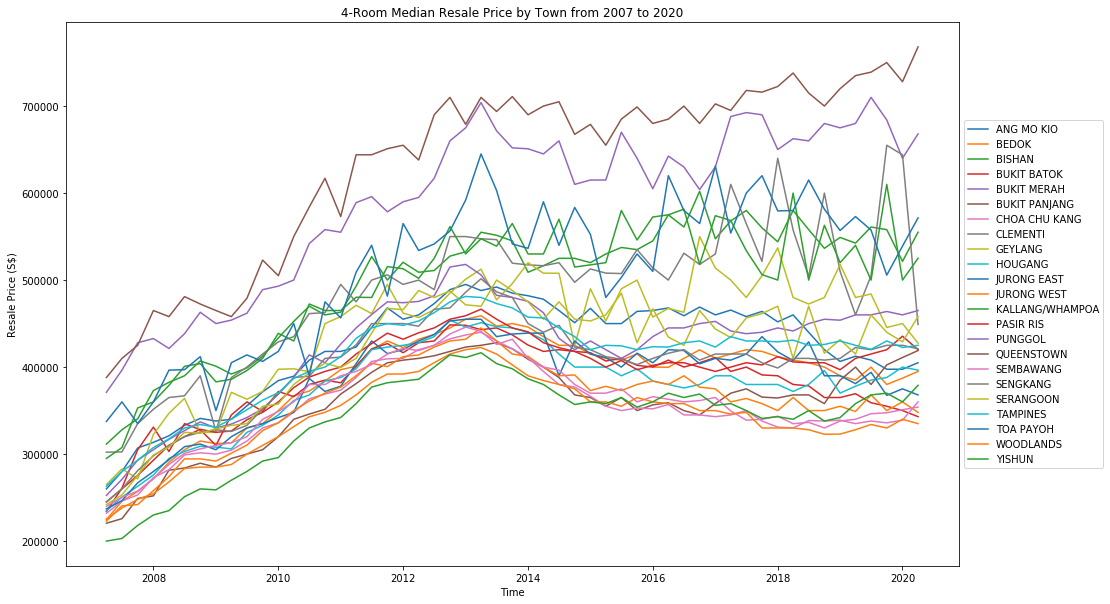

In [815]:
# look at general trend
plt.figure(figsize=(16,10))
m1 = []
t1 = []
t2 = []
for x in np.unique(data2['town']):
    data3 = data2[[i for i, v in enumerate(data2['town']) if x in v]]
    q1 = data3['quarter']
    p1 = data3['price']
    # if number of price points = 0 < 3 and total number of price points > 10
    if (sum([y==0 for y in p1]) < 3) and (len(p1) > 10):
        data3m = data3[[m for m, n in enumerate(data3['quarter']) if n.astype(object).year==2008]]['price'].mean()
        m1.append(data3m)
        p1 = fill_zeros_with_last(p1)
        plt.plot(q1, p1)
        t1.append(x)
    else:
        t2.append(x) # town that shouldnt be included
        print('Town {} has {} price data points and {} of zeros'.format(x, len(p1), sum([y==0 for y in p1])))

plt.ylabel('Resale Price (S$)')
plt.xlabel('Time')
plt.title('4-Room Median Resale Price by Town from 2007 to 2020')
plt.legend(t1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [821]:
yrrange[0]

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

Town BUKIT MERAH has median resale price of $438875.0 in 2008 and $663125.0 in 2018
Town QUEENSTOWN has median resale price of $469125.0 in 2008 and $718875.0 in 2018
Town TOA PAYOH has median resale price of $391375.0 in 2008 and $589000.0 in 2018


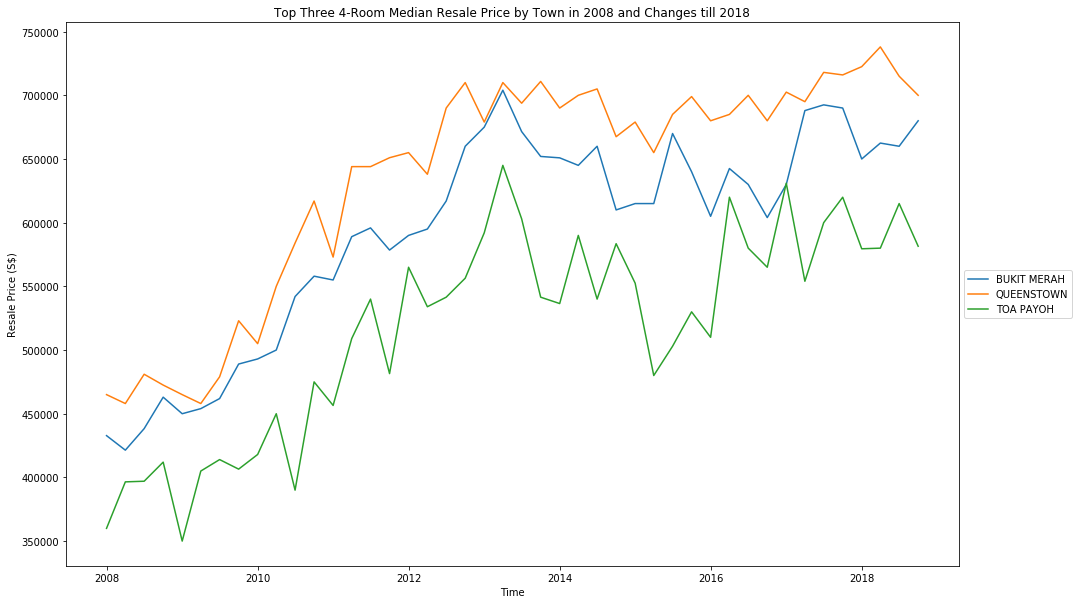

In [825]:
# looking at top 3 highest in 2008
plt.figure(figsize=(16,10))
t1 = []
for x in np.unique(data2['town']):
    if x not in t2: # exclude towns that have too many 0 points or too few price points - prevent nan error
        data2a = data2[[i for i, v in enumerate(data2['town']) if x in v]]
        data3 = data2a[[c for c, d in enumerate(data2a['quarter']) if (d.astype(object).year>=2008) &
                                                                      (d.astype(object).year<2019)]]
        q1 = data3['quarter']
        p1 = data3['price']
        data3m = data3[[m for m, n in enumerate(data3['quarter']) if n.astype(object).year==2008]]['price'].mean() 
        # if 2008 mean is in top 3 mean median resale price
        if data3m in sorted(m1, reverse=True)[:3]:
            p1 = fill_zeros_with_last(p1)
            plt.plot(q1, p1)
            t1.append(x)
            data31m = data3[[m for m, n in enumerate(data3['quarter']) if n.astype(object).year==2008]]['price'].mean() 
            data32m = data3[[r for r, s in enumerate(data3['quarter']) if s.astype(object).year==2018]]['price'].mean() 
            print('Town {} has median resale price of ${} in 2008 and ${} in 2018'.format(x, data31m, data32m))

plt.ylabel('Resale Price (S$)')
plt.xlabel('Time')
plt.title('Top Three 4-Room Median Resale Price by Town in 2008 and Changes till 2018')
plt.legend(t1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [869]:
# change in hdb price from year 2008 to year 2018
names = ['town', 'price']
formats = ['<U50', 'float64']
dtype = np.dtype({'names': names, 'formats': formats})
datadiff = np.empty((0,), dtype=dtype)

# t2 is a list of towns that has too many zero points and too few data points
for x in np.unique(data2['town']):
    if x not in t2:
        data4 = data2[[i for i, v in enumerate(data2['town']) if x in v]]
        data41 = data4[[m for m, n in enumerate(data4['quarter']) if n.astype(object).year==2008]] # 2008 data
        data42 = data4[[r for r, s in enumerate(data4['quarter']) if s.astype(object).year==2018]] # 2018 data
        datadiff = np.append(datadiff, np.array([(x, ((data42['price'].mean()-data41['price'].mean())/
                                                      data41['price'].mean())*100)], 
                                                dtype=dtype), axis=0)

datadiff = np.sort(datadiff, order=['price'])
datadiff

array([('SEMBAWANG', 15.26396983), ('CHOA CHU KANG', 15.75075725),
       ('BUKIT BATOK', 16.6846569 ), ('WOODLANDS', 20.15766798),
       ('JURONG WEST', 26.22658341), ('HOUGANG', 29.16314455),
       ('SENGKANG', 29.84836393), ('PASIR RIS', 30.07590891),
       ('BUKIT PANJANG', 31.75248419), ('TAMPINES', 32.73855702),
       ('ANG MO KIO', 35.42223921), ('BEDOK', 37.47884941),
       ('JURONG EAST', 37.74612484), ('PUNGGOL', 39.30793157),
       ('KALLANG/WHAMPOA', 40.09974739), ('YISHUN', 40.47131148),
       ('SERANGOON', 40.60509554), ('BISHAN', 42.89855072),
       ('GEYLANG', 44.98674912), ('TOA PAYOH', 50.4950495 ),
       ('BUKIT MERAH', 51.09655369), ('QUEENSTOWN', 53.23741007),
       ('CLEMENTI', 56.19273838)],
      dtype=[('town', '<U50'), ('price', '<f8')])

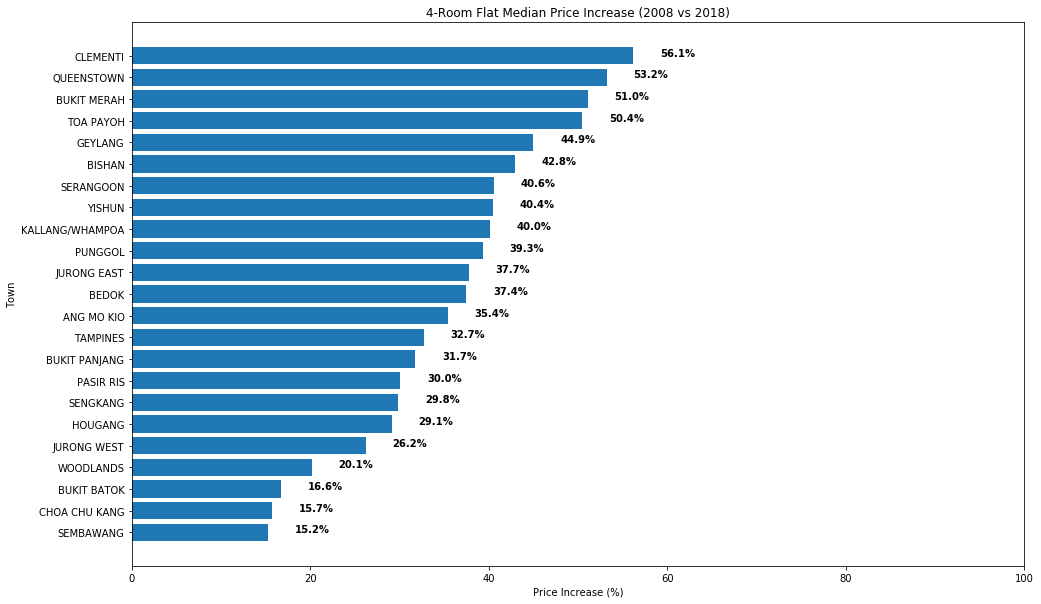

In [803]:
plt.figure(figsize=(16,10))
plt.barh(datadiff['town'], datadiff['price'], align='center')
plt.xlabel('Price Increase (%)')
plt.xlim((0,100))
plt.ylabel('Town')
plt.title('4-Room Flat Median Price Increase (2008 vs 2018)')
for i, v in enumerate(datadiff['price']):
    plt.text(v+3, i, str(v)[:4]+'%', color='black', fontweight='bold')

#### scatter plot

In [775]:
# scatter plot of number of population against median price
# looking at relationship existence between number of population of town vs median resale price
# comapre year 2008 against year 2018

In [490]:
town_data = np.loadtxt('estimated-resident-population-in-hdb-flats-by-town.csv',
                 delimiter=',', skiprows=1, dtype=[('financial_year','datetime64[Y]'),
                                                       ('town','U50'),
                                                       ('population','i8')])

In [491]:
town_data

array([('2008', 'Ang Mo Kio',  148200), ('2008', 'Bedok',  197900),
       ('2008', 'Bishan',   66500), ('2008', 'Bukit Batok',  109100),
       ('2008', 'Bukit Merah',  140600),
       ('2008', 'Bukit Panjang',  110100),
       ('2008', 'Bukit Timah',    8200),
       ('2008', 'Choa Chu Kang',  153000),
       ('2008', 'Central Area',   30100), ('2008', 'Clementi',   72500),
       ('2008', 'Geylang',   94700), ('2008', 'Hougang',  170900),
       ('2008', 'Jurong East',   79400), ('2008', 'Jurong West',  242600),
       ('2008', 'Kallang/Whampoa',  101900),
       ('2008', 'Marine Parade',   22700), ('2008', 'Pasir Ris',  107600),
       ('2008', 'Punggol',   58700), ('2008', 'Queenstown',   81700),
       ('2008', 'Sembawang',   65000), ('2008', 'Sengkang',  152400),
       ('2008', 'Serangoon',   74700), ('2008', 'Tampines',  234500),
       ('2008', 'Toa Payoh',  102100), ('2008', 'Woodlands',  225900),
       ('2008', 'Yishun',  169100), ('2008', 'Total', 3020100),
       ('2009'

In [876]:
# take 2018Q2-Q4 and 2019-Q1 data from median resale price data
yr2018 = [np.datetime64(j) for j in ['2018-04','2018-07','2018-10','2019-01']]
data5 = data2[[i for i, v in enumerate(data2['quarter']) if v in yr2018]]

In [877]:
names = ['town', 'price']
formats = ['<U50', 'float64']
dtype = np.dtype({'names': names, 'formats': formats})
pricedata2018 = np.empty((0,), dtype=dtype)

# take mean of the 4 given resale price
for x in np.unique(data5['town']):
    pricedata2018 = np.append(pricedata2018, np.array([(x, data5[[i for i, v in enumerate(data5['town']) if v==x]]
                                                        ['price'].mean())], dtype=dtype), axis=0)

In [878]:
# town and average median resale price in 2018
pricedata2018

array([('ANG MO KIO', 431625.), ('BEDOK', 400750.), ('BISHAN', 555875.),
       ('BUKIT BATOK', 372100.), ('BUKIT MERAH', 669375.),
       ('BUKIT PANJANG', 369750.), ('BUKIT TIMAH',      0.),
       ('CENTRAL', 217500.), ('CHOA CHU KANG', 336375.),
       ('CLEMENTI', 542875.), ('GEYLANG', 487625.), ('HOUGANG', 379525.),
       ('JURONG EAST', 404125.), ('JURONG WEST', 355000.),
       ('KALLANG/WHAMPOA', 545750.), ('MARINE PARADE',      0.),
       ('PASIR RIS', 403225.), ('PUNGGOL', 450100.),
       ('QUEENSTOWN', 718250.), ('SEMBAWANG', 334850.),
       ('SENGKANG', 409500.), ('SERANGOON', 431875.),
       ('TAMPINES', 428000.), ('TOA PAYOH', 583375.),
       ('WOODLANDS', 325950.), ('YISHUN', 342500.)],
      dtype=[('town', '<U50'), ('price', '<f8')])

In [879]:
# take 2018 data from town population data
towndata2018 = town_data[[i for i, v in enumerate(town_data['financial_year']) if v.astype(object).year==2018]]

In [880]:
# upper case of all town string for existence checks
for x in towndata2018:
    for i, y in enumerate(x):
        if isinstance(y, str):
            x[i] = y.upper()

In [881]:
print(len(pricedata2018))
print(len(towndata2018))

26
26


In [882]:
# check if array index value is in sync
# will assume here central =  central area
if (pricedata2018['town']==towndata2018['town']).all() == False:
    for i in np.arange(0,len(pricedata2018),1):
        if not pricedata2018['town'][i] == towndata2018['town'][i]:
            print(pricedata2018['town'][i])
            print(towndata2018['town'][i])

CENTRAL
CENTRAL AREA


In [926]:
names = ['town', 'price', 'population']
formats = ['<U50', 'i8', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
data2018 = np.empty((0,), dtype=dtype)

# 'concatentate' resale price and population 
for i in np.arange(0, len(pricedata2018), 1):
    # not considering bukit timah & marine parade because median resale price is shown 0
    if not pricedata2018['town'][i] in ['BUKIT TIMAH', 'MARINE PARADE']:
        data2018 = np.append(data2018, np.array([(pricedata2018['town'][i], pricedata2018['price'][i],
                                             towndata2018['population'][i])], dtype=dtype), axis=0)

# remove CENTRAL from data since there is no CENTRAL in 2008
# town, median resale price, population in 2018        
data2018 = data2018[data2018['town']!='CENTRAL']
data2018

array([('ANG MO KIO', 431625, 141600), ('BEDOK', 400750, 191300),
       ('BISHAN', 555875,  62100), ('BUKIT BATOK', 372100, 115200),
       ('BUKIT MERAH', 669375, 144300), ('BUKIT PANJANG', 369750, 120100),
       ('CHOA CHU KANG', 336375, 168500), ('CLEMENTI', 542875,  71900),
       ('GEYLANG', 487625,  86900), ('HOUGANG', 379525, 179100),
       ('JURONG EAST', 404125,  77300), ('JURONG WEST', 355000, 257600),
       ('KALLANG/WHAMPOA', 545750, 106100), ('PASIR RIS', 403225, 107800),
       ('PUNGGOL', 450100, 138700), ('QUEENSTOWN', 718250,  81800),
       ('SEMBAWANG', 334850,  73800), ('SENGKANG', 409500, 213200),
       ('SERANGOON', 431875,  68000), ('TAMPINES', 428000, 231800),
       ('TOA PAYOH', 583375, 104200), ('WOODLANDS', 325950, 242800),
       ('YISHUN', 342500, 197300)],
      dtype=[('town', '<U50'), ('price', '<i8'), ('population', '<i8')])

In [884]:
# for 2008 data
yr2008 = [np.datetime64(k) for k in ['2008-04','2008-07','2008-10','2009-01']]
data6 = data2[[i for i, v in enumerate(data2['quarter']) if v in yr2008]]

names = ['town', 'price']
formats = ['<U50', 'float64']
dtype = np.dtype({'names': names, 'formats': formats})
pricedata2008 = np.empty((0,), dtype=dtype)

for x in np.unique(data6['town']):
    pricedata2008 = np.append(pricedata2008, np.array([(x, data6[[i for i, v in enumerate(data6['town']) if v==x]]
                                                        ['price'].mean())], dtype=dtype), axis=0)

In [885]:
towndata2008 = town_data[[i for i, v in enumerate(town_data['financial_year']) if v.astype(object).year==2008]]

for x in towndata2008:
    for i, y in enumerate(x):
        if isinstance(y, str):
            x[i] = y.upper()
            
print(len(pricedata2008))
print(len(towndata2008))

26
27


In [886]:
# extra element of total...
towndata2008

array([('2008', 'ANG MO KIO',  148200), ('2008', 'BEDOK',  197900),
       ('2008', 'BISHAN',   66500), ('2008', 'BUKIT BATOK',  109100),
       ('2008', 'BUKIT MERAH',  140600),
       ('2008', 'BUKIT PANJANG',  110100),
       ('2008', 'BUKIT TIMAH',    8200),
       ('2008', 'CHOA CHU KANG',  153000),
       ('2008', 'CENTRAL AREA',   30100), ('2008', 'CLEMENTI',   72500),
       ('2008', 'GEYLANG',   94700), ('2008', 'HOUGANG',  170900),
       ('2008', 'JURONG EAST',   79400), ('2008', 'JURONG WEST',  242600),
       ('2008', 'KALLANG/WHAMPOA',  101900),
       ('2008', 'MARINE PARADE',   22700), ('2008', 'PASIR RIS',  107600),
       ('2008', 'PUNGGOL',   58700), ('2008', 'QUEENSTOWN',   81700),
       ('2008', 'SEMBAWANG',   65000), ('2008', 'SENGKANG',  152400),
       ('2008', 'SERANGOON',   74700), ('2008', 'TAMPINES',  234500),
       ('2008', 'TOA PAYOH',  102100), ('2008', 'WOODLANDS',  225900),
       ('2008', 'YISHUN',  169100), ('2008', 'TOTAL', 3020100)],
      dtype=[

In [887]:
# remove last element of 'total' from towndata2008
towndata2008 = towndata2008[:26]

In [888]:
if (pricedata2008['town']==towndata2008['town']).all() == False:
    for i in np.arange(0,len(pricedata2008),1):
        if not pricedata2008['town'][i] == towndata2008['town'][i]:
            print(i, pricedata2008['town'][i])
            print(i, towndata2008['town'][i])

7 CENTRAL
7 CHOA CHU KANG
8 CHOA CHU KANG
8 CENTRAL AREA


In [889]:
# tuple unpacking
# swap places of towndata2008
towndata2008[[7,8]] = towndata2008[[8,7]]

In [890]:
names = ['town', 'price', 'population']
formats = ['<U50', 'i8', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
data2008 = np.empty((0,), dtype=dtype)

for i in np.arange(0, len(pricedata2008), 1):
    if not pricedata2008['town'][i] in ['BUKIT TIMAH', 'MARINE PARADE', 'CENTRAL']:
        data2008 = np.append(data2008, np.array([(pricedata2008['town'][i], pricedata2008['price'][i],
                                             towndata2008['population'][i])], dtype=dtype), axis=0)

data2008

array([('ANG MO KIO', 333250, 148200), ('BEDOK', 305625, 197900),
       ('BISHAN', 395125,  66500), ('BUKIT BATOK', 319000, 109100),
       ('BUKIT MERAH', 443175, 140600), ('BUKIT PANJANG', 285000, 110100),
       ('CHOA CHU KANG', 295625, 153000), ('CLEMENTI', 362000,  72500),
       ('GEYLANG', 340225,  94700), ('HOUGANG', 303750, 170900),
       ('JURONG EAST', 304625,  79400), ('JURONG WEST', 288750, 242600),
       ('KALLANG/WHAMPOA', 391725, 101900), ('PASIR RIS', 320875, 107600),
       ('PUNGGOL', 327750,  58700), ('QUEENSTOWN', 469125,  81700),
       ('SEMBAWANG', 301200,  65000), ('SENGKANG', 320750, 152400),
       ('SERANGOON', 321500,  74700), ('TAMPINES', 328125, 234500),
       ('TOA PAYOH', 388875, 102100), ('WOODLANDS', 280350, 225900),
       ('YISHUN', 251225, 169100)],
      dtype=[('town', '<U50'), ('price', '<i8'), ('population', '<i8')])

2008 correlation coefficient: -0.40
2018 correlation coefficient: -0.46


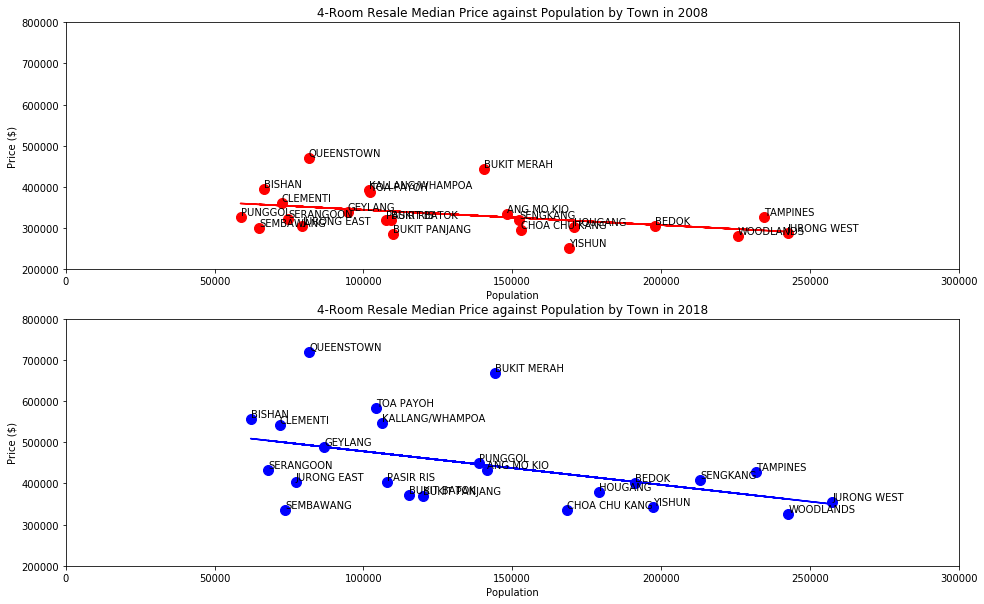

In [927]:
# population v price scatter plot
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.scatter(data2008['population'], data2008['price'], c='red', s=100)
plt.ylim((200000,800000))
plt.xlim((0,300000))
plt.ylabel('Price ($)')
plt.xlabel('Population')
plt.title('4-Room Resale Median Price against Population by Town in 2008')
for i, v in enumerate(data2008['town']):
    plt.annotate(v, (data2008['population'][i], data2008['price'][i]), ha='left', va='bottom')
m, b = np.polyfit(data2008['population'], data2008['price'], 1)
plt.plot(data2008['population'], m*data2008['population']+b, c='red');

plt.subplot(212)
plt.scatter(data2018['population'], data2018['price'], c='blue', s=100)
plt.ylim((200000,800000))
plt.xlim((0,300000))
plt.ylabel('Price ($)')
plt.xlabel('Population')
plt.title('4-Room Resale Median Price against Population by Town in 2018')
for i, v in enumerate(data2018['town']):
    plt.annotate(v, (data2018['population'][i], data2018['price'][i]), ha='left', va='bottom')
m, b = np.polyfit(data2018['population'], data2018['price'], 1)
plt.plot(data2018['population'], m*data2018['population']+b, c='blue');

print('2008 correlation coefficient: {:.2f}'.format(np.corrcoef(data2008['population'], data2008['price'])[0][1]))
print('2018 correlation coefficient: {:.2f}'.format(np.corrcoef(data2018['population'], data2018['price'])[0][1]))

In [ ]:
# get land data

In [945]:
land_data = np.genfromtxt('land-area-and-dwelling-units-by-town.csv',
                 delimiter=',', skip_header=1, dtype=[('financial_year','datetime64[Y]'),
                                                       ('town','U50'),
                                                       ('total_land_area','i8'),
                                                       ('residential_land_area','i8'),
                                                       ('dwelling_units_under_management','i8'),
                                                       ('projected_ultimate_dwelling_units','i8')],
                         missing_values=['na','-'], filling_values=0)

for x in land_data:
    for i, y in enumerate(x):
        if isinstance(y, str):
            x[i] = y.upper()

In [946]:
land_data

array([('2008', 'ANG MO KIO',  638, 283, 48069,  58000),
       ('2008', 'BEDOK',  937, 408, 59929,  74000),
       ('2008', 'BISHAN',  690, 172, 19367,  32000),
       ('2008', 'BUKIT BATOK',  785, 291, 31731,  47000),
       ('2008', 'BUKIT MERAH',  858, 312, 50247,  68000),
       ('2008', 'BUKIT PANJANG',  489, 228, 29498,  43000),
       ('2008', 'CHOA CHU KANG',  583, 307, 39173,  62000),
       ('2008', 'CLEMENTI',  408, 198, 23873,  35000),
       ('2008', 'GEYLANG',  678, 214, 30417,  49000),
       ('2008', 'HOUGANG', 1276, 354, 47819,  68000),
       ('2008', 'JURONG EAST',  384, 165, 22299,  29000),
       ('2008', 'JURONG WEST',  987, 480, 68758,  92000),
       ('2008', 'KALLANG/ WHAMPOA',  799, 200, 34288,  54000),
       ('2008', 'PASIR RIS',  601, 318, 27514,  44000),
       ('2008', 'PUNGGOL',  957, 422, 17103,  96000),
       ('2008', 'QUEENSTOWN',  687, 210, 29077,  60000),
       ('2008', 'SEMBAWANG',  708, 317, 17664,  60000),
       ('2008', 'SENGKANG', 1055, 397

In [902]:
# filter land data for 2008
# extract only residential land area element
land_data2 = land_data[[i for i, v in enumerate(land_data['financial_year']) if v.astype(object).year==2008]]

names = ['town', 'land_area']
formats = ['<U50', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
landdata2008 = np.empty((0,), dtype=dtype)

for x in np.unique(land_data2['town']):
    landdata2008 = np.append(landdata2008, np.array([(x, land_data2[[i for i, v in enumerate(land_data2['town']) if v==x]]
                                                        ['residential_land_area'])], dtype=dtype), axis=0)

In [967]:
print(len(data2008))
print(len(landdata2008))

23
23


In [933]:
# remove 'OTHER ESTATES'
landdata2008 = landdata2008[landdata2008['town']!='OTHER ESTATES']

In [951]:
if (data2008['town']==landdata2008['town']).all() == False:
    for i in np.arange(0,len(landdata2008),1):
        if not data2008['town'][i] == landdata2008['town'][i]:
            print(i, data2008['town'][i])
            print(i, landdata2008['town'][i])
else:
    print('no diff!')

12 KALLANG/WHAMPOA
12 KALLANG/ WHAMPOA


In [954]:
# remove white space in kallang/whampoa
for x in landdata2008:
    for i, y in enumerate(x):
        if y=='KALLANG/ WHAMPOA':
            x[i] = y.replace(" ","")

In [962]:
names = ['town', 'price', 'density']
formats = ['<U50', 'i8', 'float64']
dtype = np.dtype({'names': names, 'formats': formats})
density2008 = np.empty((0,), dtype=dtype)

for i in np.arange(0, len(data2008), 1):
    density2008 = np.append(density2008, np.array([(data2008['town'][i], data2008['price'][i],
                                             data2008['population'][i]/landdata2008['land_area'][i])], 
                                                  dtype=dtype), axis=0)

density2008

array([('ANG MO KIO', 333250, 523.67491166),
       ('BEDOK', 305625, 485.04901961), ('BISHAN', 395125, 386.62790698),
       ('BUKIT BATOK', 319000, 374.91408935),
       ('BUKIT MERAH', 443175, 450.64102564),
       ('BUKIT PANJANG', 285000, 482.89473684),
       ('CHOA CHU KANG', 295625, 498.3713355 ),
       ('CLEMENTI', 362000, 366.16161616),
       ('GEYLANG', 340225, 442.52336449),
       ('HOUGANG', 303750, 482.76836158),
       ('JURONG EAST', 304625, 481.21212121),
       ('JURONG WEST', 288750, 505.41666667),
       ('KALLANG/WHAMPOA', 391725, 509.5       ),
       ('PASIR RIS', 320875, 338.36477987),
       ('PUNGGOL', 327750, 139.09952607),
       ('QUEENSTOWN', 469125, 389.04761905),
       ('SEMBAWANG', 301200, 205.04731861),
       ('SENGKANG', 320750, 383.8790932 ),
       ('SERANGOON', 321500, 478.84615385),
       ('TAMPINES', 328125, 469.        ),
       ('TOA PAYOH', 388875, 486.19047619),
       ('WOODLANDS', 280350, 430.28571429),
       ('YISHUN', 251225, 385.1

In [963]:
# filter land data for 2018
land_data3 = land_data[[i for i, v in enumerate(land_data['financial_year']) if v.astype(object).year==2018]]

names = ['town', 'land_area']
formats = ['<U50', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
landdata2018 = np.empty((0,), dtype=dtype)

for x in np.unique(land_data3['town']):
    landdata2018 = np.append(landdata2018, np.array([(x, land_data3[[i for i, v in enumerate(land_data3['town']) if v==x]]
                                                        ['residential_land_area'])], dtype=dtype), axis=0)

In [964]:
landdata2018

array([('ANG MO KIO', 283), ('BEDOK', 418), ('BISHAN', 172),
       ('BUKIT BATOK', 291), ('BUKIT MERAH', 312), ('BUKIT PANJANG', 219),
       ('CHOA CHU KANG', 307), ('CLEMENTI', 203), ('GEYLANG', 214),
       ('HOUGANG', 367), ('JURONG EAST', 165), ('JURONG WEST', 480),
       ('KALLANG/ WHAMPOA', 210), ('OTHER ESTATES', 126),
       ('PASIR RIS', 318), ('PUNGGOL', 374), ('QUEENSTOWN', 210),
       ('SEMBAWANG', 331), ('SENGKANG', 397), ('SERANGOON', 163),
       ('TAMPINES', 549), ('TENGAH', 165), ('TOA PAYOH', 248),
       ('WOODLANDS', 486), ('YISHUN', 398)],
      dtype=[('town', '<U50'), ('land_area', '<i8')])

In [968]:
print(len(data2018))
print(len(landdata2018))

23
25


In [985]:
# remove 'OTHER ESTATES' & 'TENGAH'
landdata2018 = np.array([x for x in landdata2018 if x['town'] not in ['OTHER ESTATES','TENGAH']])

In [986]:
landdata2018

array([('ANG MO KIO', 283), ('BEDOK', 418), ('BISHAN', 172),
       ('BUKIT BATOK', 291), ('BUKIT MERAH', 312), ('BUKIT PANJANG', 219),
       ('CHOA CHU KANG', 307), ('CLEMENTI', 203), ('GEYLANG', 214),
       ('HOUGANG', 367), ('JURONG EAST', 165), ('JURONG WEST', 480),
       ('KALLANG/ WHAMPOA', 210), ('PASIR RIS', 318), ('PUNGGOL', 374),
       ('QUEENSTOWN', 210), ('SEMBAWANG', 331), ('SENGKANG', 397),
       ('SERANGOON', 163), ('TAMPINES', 549), ('TOA PAYOH', 248),
       ('WOODLANDS', 486), ('YISHUN', 398)],
      dtype=[('town', '<U50'), ('land_area', '<i8')])

In [987]:
if (data2018['town']==landdata2018['town']).all() == False:
    for i in np.arange(0,len(landdata2018),1):
        if not data2018['town'][i] == landdata2018['town'][i]:
            print(i, data2018['town'][i])
            print(i, landdata2018['town'][i])
else:
    print('no diff!')

12 KALLANG/WHAMPOA
12 KALLANG/ WHAMPOA


In [988]:
# remove white space in kallang/whampoa
for x in landdata2018:
    for i, y in enumerate(x):
        if y=='KALLANG/ WHAMPOA':
            x[i] = y.replace(" ","")

In [989]:
names = ['town', 'price', 'density']
formats = ['<U50', 'i8', 'float64']
dtype = np.dtype({'names': names, 'formats': formats})
density2018 = np.empty((0,), dtype=dtype)

for i in np.arange(0, len(data2018), 1):
    density2018 = np.append(density2018, np.array([(data2018['town'][i], data2018['price'][i],
                                             data2018['population'][i]/landdata2018['land_area'][i])], 
                                                  dtype=dtype), axis=0)

density2018

array([('ANG MO KIO', 431625, 500.35335689),
       ('BEDOK', 400750, 457.65550239), ('BISHAN', 555875, 361.04651163),
       ('BUKIT BATOK', 372100, 395.87628866),
       ('BUKIT MERAH', 669375, 462.5       ),
       ('BUKIT PANJANG', 369750, 548.40182648),
       ('CHOA CHU KANG', 336375, 548.85993485),
       ('CLEMENTI', 542875, 354.18719212),
       ('GEYLANG', 487625, 406.07476636),
       ('HOUGANG', 379525, 488.01089918),
       ('JURONG EAST', 404125, 468.48484848),
       ('JURONG WEST', 355000, 536.66666667),
       ('KALLANG/WHAMPOA', 545750, 505.23809524),
       ('PASIR RIS', 403225, 338.99371069),
       ('PUNGGOL', 450100, 370.85561497),
       ('QUEENSTOWN', 718250, 389.52380952),
       ('SEMBAWANG', 334850, 222.96072508),
       ('SENGKANG', 409500, 537.02770781),
       ('SERANGOON', 431875, 417.17791411),
       ('TAMPINES', 428000, 422.22222222),
       ('TOA PAYOH', 583375, 420.16129032),
       ('WOODLANDS', 325950, 499.58847737),
       ('YISHUN', 342500, 495.7

2008 correlation coefficient: 0.01
2018 correlation coefficient: -0.22


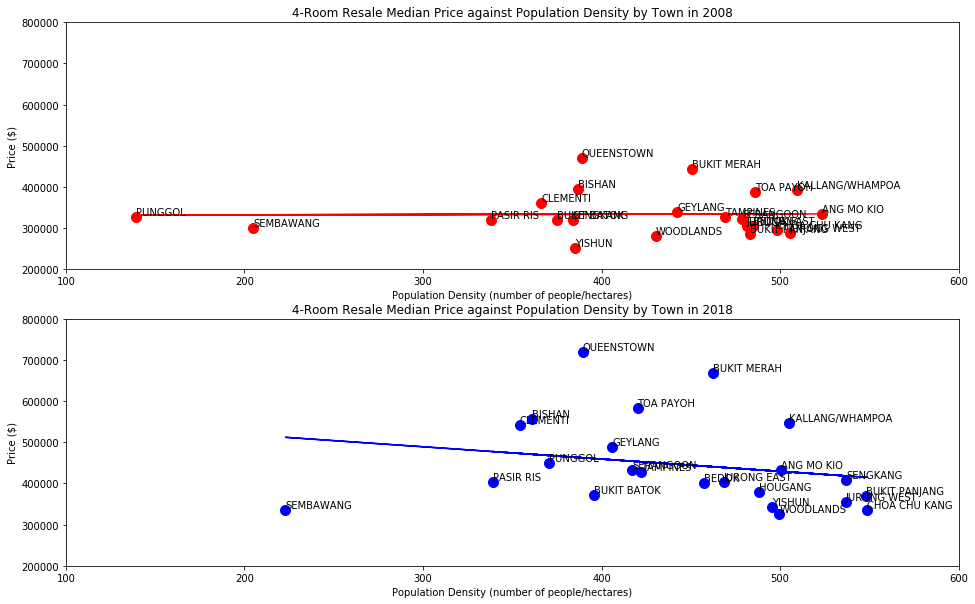

In [992]:
# population density v price scatter plot
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.scatter(density2008['density'], density2008['price'], c='red', s=100)
plt.ylim((200000,800000))
plt.xlim((100,600))
plt.ylabel('Price ($)')
plt.xlabel('Population Density (number of people/hectares)')
plt.title('4-Room Resale Median Price against Population Density by Town in 2008')
for i, v in enumerate(density2008['town']):
    plt.annotate(v, (density2008['density'][i], density2008['price'][i]), ha='left', va='bottom')
m, b = np.polyfit(density2008['density'], density2008['price'], 1)
plt.plot(density2008['density'], m*density2008['density']+b, c='red');

plt.subplot(212)
plt.scatter(density2018['density'], density2018['price'], c='blue', s=100)
plt.ylim((200000,800000))
plt.xlim((100,600))
plt.ylabel('Price ($)')
plt.xlabel('Population Density (number of people/hectares)')
plt.title('4-Room Resale Median Price against Population Density by Town in 2018')
for i, v in enumerate(density2018['town']):
    plt.annotate(v, (density2018['density'][i], density2018['price'][i]), ha='left', va='bottom')
m, b = np.polyfit(density2018['density'], density2018['price'], 1)
plt.plot(density2018['density'], m*density2018['density']+b, c='blue');

print('2008 correlation coefficient: {:.2f}'.format(np.corrcoef(density2008['density'], density2008['price'])[0][1]))
print('2018 correlation coefficient: {:.2f}'.format(np.corrcoef(density2018['density'], density2018['price'])[0][1]))

#### donut and box plot

In [ ]:
# box plot of median against all price data points
# see anamolies and skewedness

# donut chart - alternate view of pie chart
# better representation of pie chart
# see percentage of resale transactions for each town in year 2018

In [21]:
# look at all available resale price data from 2017 onwards
resale_data = np.genfromtxt("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                             delimiter=',', skip_header=1, dtype=[('month','datetime64[M]'),
                                                              ('town','U50'),
                                                              ('flat_type','U50'),
                                                              ('block','U50'),
                                                              ('street_name','U50'),
                                                              ('storey_range','U50'),
                                                              ('floor_area_sqm','U50'),
                                                              ('flat_model','U50'),
                                                              ('lease_commence_date','U50'),
                                                              ('remaining_lease','U50'),
                                                              ('resale_price','float64')],
                            missing_values=['na','-'], filling_values=0)

In [22]:
# filter the data for year 2018 only
resaledata2018 = resale_data[[i for i, v in enumerate(resale_data['month']) if v.astype(object).year==2018]]
# further filter the data for 4-room only
resaledata2018 = resaledata2018[[m for m, n in enumerate(resaledata2018['flat_type']) if n=='4 ROOM']]

Total number of 4-room resale units transactions in 2018: 8769

There is 249 number of transactions of 4-room resale units in ANG MO KIO, 2.8% of all available transactions in 2018.
There is 351 number of transactions of 4-room resale units in BEDOK, 4.0% of all available transactions in 2018.
There is 200 number of transactions of 4-room resale units in BISHAN, 2.3% of all available transactions in 2018.
There is 330 number of transactions of 4-room resale units in BUKIT BATOK, 3.8% of all available transactions in 2018.
There is 343 number of transactions of 4-room resale units in BUKIT MERAH, 3.9% of all available transactions in 2018.
There is 328 number of transactions of 4-room resale units in BUKIT PANJANG, 3.7% of all available transactions in 2018.
There is 21 number of transactions of 4-room resale units in BUKIT TIMAH, 0.2% of all available transactions in 2018.
There is 69 number of transactions of 4-room resale units in CENTRAL AREA, 0.8% of all available transactions in 2

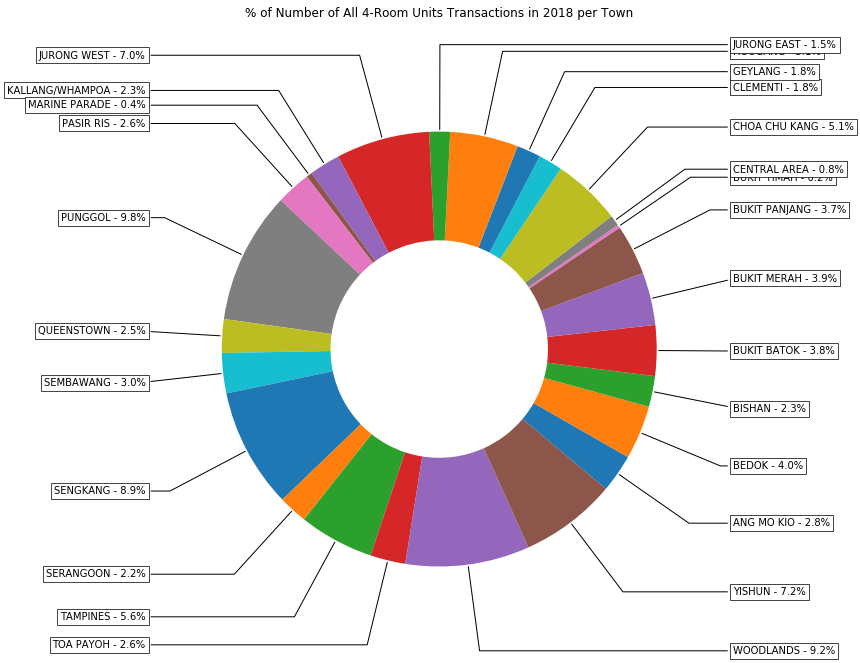

In [862]:
listp = [] # list for all transactional prices per town
listt = [] # list for all towns
listl = [] # list for the number of transactions per town
listw = [] # list for wording in donut - show town and percentage of all transactions in 2018

print('Total number of 4-room resale units transactions in 2018: {}'.format(len(resaledata2018)))
print('')

for x in np.unique(resaledata2018['town']):
    resdata = resaledata2018[[i for i, v in enumerate(resaledata2018['town']) if x in v]]
    print('There is {} number of transactions of 4-room resale units in {}, {:.1f}% of all available transactions in 2018.'
          .format(len(resdata), x, (len(resdata)/len(resaledata2018))*100))

    listp.append(resdata['resale_price'])
    listt.append(x)
    listl.append(len(resdata))
    listw.append(str(x)+' - '+str(round((len(resdata)/len(resaledata2018))*100,1))+'%')

# donut plot
fig, ax = plt.subplots(figsize=(16,10), subplot_kw = dict(aspect='equal'))
wedges, texts = ax.pie(listl, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle='square, pad=0.3', fc='w', ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va='center')
for i, p  in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1:'left'}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(listw[i], xy=(x,y), xytext=(1.35*np.sign(x), 1.4*y),
                   horizontalalignment=horizontalalignment, **kw)
    
# title at y=1.1 so to avoid being overlapped
ax.set_title('% of Number of All 4-Room Units Transactions in 2018 per Town', y=1.1);

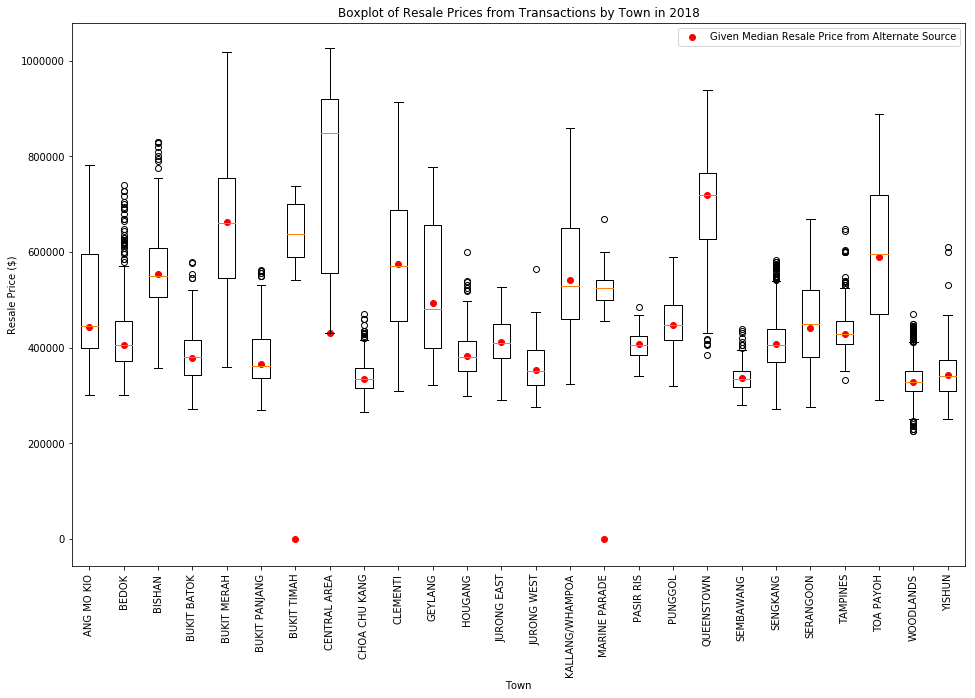

In [864]:
plt.figure(figsize=(16,10))
bplot = plt.boxplot(listp,labels=listt);
# plot the alternate/original source of given median resale price
# pricedata2018 is from data, from median-resale-prices-for-registered-applications-by-town-and-flat-type.csv
for i, j in enumerate(pricedata2018['price']):
    k = plt.scatter(i+1, j, c='red', label='Given Median Resale Price from Alternate Source' if i==0 else "")
plt.legend(loc='upper right')
plt.xticks(rotation=90);
plt.ylabel('Resale Price ($)')
plt.xlabel('Town')
plt.title('Boxplot of Resale Prices from Transactions by Town in 2018');

In [865]:
for i, line in enumerate(bplot['medians']):
    x,y = line.get_xydata()[1]
    if listt[i] not in ['BUKIT TIMAH', 'MARINE PARADE']:
        print('Town {} has all data at median price of ${}, a difference of {:.1f}% from given median price.'.
         format(listt[i], y, ((y-pricedata2018['price'][i])/pricedata2018['price'][i])*100))

Town ANG MO KIO has all data at median price of $445000.0, a difference of 0.5% from given median price.
Town BEDOK has all data at median price of $405000.0, a difference of -0.3% from given median price.
Town BISHAN has all data at median price of $550000.0, a difference of -0.8% from given median price.
Town BUKIT BATOK has all data at median price of $380000.0, a difference of 0.4% from given median price.
Town BUKIT MERAH has all data at median price of $660000.0, a difference of -0.5% from given median price.
Town BUKIT PANJANG has all data at median price of $361000.0, a difference of -1.0% from given median price.
Town CENTRAL AREA has all data at median price of $850000.0, a difference of 97.7% from given median price.
Town CHOA CHU KANG has all data at median price of $335000.0, a difference of 0.2% from given median price.
Town CLEMENTI has all data at median price of $570000.0, a difference of -0.9% from given median price.
Town GEYLANG has all data at median price of $4815

#### sandbox

In [94]:
def parsedate(x):
    if int(x[-1])<4:
        return datetime.strptime(str(x[:-2])+'0'+str((3*int(x[-1]))-2), '%Y-%m')
    else:
        return datetime.strptime(str(x[:-2])+str((3*int(x[-1]))-2), '%Y-%m')

parsedate('2007-01') + np.timedelta64(5,'Y')

TypeError: ufunc add cannot use operands with types dtype('O') and dtype('<m8[Y]')

In [95]:
data

array([('2007-04', 'Ang Mo Kio', '1-room',      0),
       ('2007-04', 'Ang Mo Kio', '2-room',      0),
       ('2007-04', 'Ang Mo Kio', '3-room', 172000), ...,
       ('2020-04', 'YISHUN', '4-ROOM', 379000),
       ('2020-04', 'YISHUN', '5-ROOM', 485000),
       ('2020-04', 'YISHUN', 'EXEC',      0)],
      dtype=[('quarter', '<M8[M]'), ('town', '<U50'), ('flat_type', '<U50'), ('price', '<i8')])

In [167]:
names = ['financial_year', 'flat_type', 'no_of_dwelling_units']
formats = ['<U50', '<U50', 'i8']
dtype = np.dtype({'names': names, 'formats': formats})
population_data0 = np.empty((0,), dtype=dtype)

for x in np.unique(population_data2['financial_year']):
    population_data3 = population_data2[[i for i, v in enumerate(population_data2['financial_year']) if x in v]]
    for y in np.unique(population_data3['flat_type']):
        z = population_data3[[m for m, n in enumerate(population_data3['flat_type']) if y in n]]['no_of_dwelling_units'].sum()
        population_data0 = np.append(population_data0, np.array([tuple((x,y,z))], dtype=population_data0.dtype), axis=0)

In [169]:
population_data0.shape

(83,)

In [149]:
h.shape

(2,)

In [157]:
g = np.array([(x,y,z)], dtype=[('financial_year','<U50'),('flat_type','<U50'),('no_of_dwelling_units', '<i8')])
g.shape

(1,)

In [148]:
h = np.append(g, np.array([('2008','2-room',33000)], dtype=[('financial_year','<U50'),('flat_type','<U50'),('no_of_dwelling_units', '<i8')]),axis=0)
h

array([('2008', '1-room',   258), ('2008', '2-room', 33000)],
      dtype=[('financial_year', '<U50'), ('flat_type', '<U50'), ('no_of_dwelling_units', '<i8')])

In [136]:
population_data3

array([('2008', 'Ang Mo Kio', '1-room', 'Sold Units',     0),
       ('2008', 'Ang Mo Kio', '2-room', 'Sold Units',   633),
       ('2008', 'Ang Mo Kio', '3-room', 'Sold Units', 24437),
       ('2008', 'Ang Mo Kio', '4-room', 'Sold Units', 13023),
       ('2008', 'Ang Mo Kio', '5-room', 'Sold Units',  5252),
       ('2008', 'Ang Mo Kio', 'Executive', 'Sold Units',   481),
       ('2008', 'Ang Mo Kio', 'Studio Apartment', 'Sold Units',     0),
       ('2008', 'Ang Mo Kio', 'HUDC', 'Sold Units',     0),
       ('2008', 'Bedok', '1-room', 'Sold Units',     0),
       ('2008', 'Bedok', '2-room', 'Sold Units',   670),
       ('2008', 'Bedok', '3-room', 'Sold Units', 22555),
       ('2008', 'Bedok', '4-room', 'Sold Units', 20247),
       ('2008', 'Bedok', '5-room', 'Sold Units', 10182),
       ('2008', 'Bedok', 'Executive', 'Sold Units',  2712),
       ('2008', 'Bedok', 'Studio Apartment', 'Sold Units',   130),
       ('2008', 'Bedok', 'HUDC', 'Sold Units',     0),
       ('2008', 'Bishan', 

In [137]:
population_data3.shape

(208,)

In [222]:
d = np.loadtxt("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
               delimiter=',',skiprows=1,
               dtype= np.dtype[('Month'),('town'),('flat_type'),('remaining_lease'),('resale_price')])
print(d)
print(d.shape)

TypeError: 'type' object is not subscriptable

In [238]:
population_data['no_of_dwelling_units']

array([ 1318,     0,  2860,   633,    62, 24437,     3, 13023,     0,
        5252,   481,     0,     0,     0,  2250,     0,  1155,   670,
          28, 22555,     0, 20247,     0, 10182,  2712,     0,   130,
           0,   396,     0,     0,     0,     0,  2359,     0,  9199,
           0,  5395,  1660,     0,     0,   358,    20,     0,    20,
           0,     6, 10271,     0, 13850,     0,  4832,  2732,     0,
           0,     0,  4473,   258,  4980,  1018,   198, 16038,    96,
       13832,     0,  9098,    44,     0,   212,     0,     0,     0,
           0,     0,     0,  2620,     0, 13980,     0,  9517,  3381,
           0,     0,     0,     0,     0,     0,     0,     0,   441,
           0,   920,     0,   682,   380,     0,     0,     0,  2073,
           0,   975,   341,    53,  4695,    14,  2282,     0,   284,
           9,     0,     0,    38,     0,     0,   240,     0,     0,
        1312,     0, 19437,     0, 13422,  4762,     0,     0,     0,
         454,     0,

In [224]:
len(population_data['flat_type'])

3887

In [231]:
len(population_data.dtype)

5

In [371]:
p1

array([200000, 203000, 218000, 230000, 235000, 251000, 260000, 258900,
       270000, 280000, 292000, 296000, 315000, 330000, 337000, 342000,
       358000, 377000, 382000, 384000, 386000, 400000, 414000, 411000,
       416500, 404000, 398000, 386500, 380000, 368000, 357000, 360000,
       358000, 365000, 354000, 360000, 370000, 365000, 369000, 356000,
       358000, 350000, 341000, 343000, 340000, 350000, 338000, 342000,
       358000, 368000, 370000, 360000, 379000], dtype=int64)

In [379]:
sum([y==350000 for y in p1])

2

In [377]:
p1

array([200000, 203000, 218000, 230000, 235000, 251000, 260000, 258900,
       270000, 280000, 292000, 296000, 315000, 330000, 337000, 342000,
       358000, 377000, 382000, 384000, 386000, 400000, 414000, 411000,
       416500, 404000, 398000, 386500, 380000, 368000, 357000, 360000,
       358000, 365000, 354000, 360000, 370000, 365000, 369000, 356000,
       358000, 350000, 341000, 343000, 340000, 350000, 338000, 342000,
       358000, 368000, 370000, 360000, 379000], dtype=int64)

Wedge(center=(0, 0), r=1, theta1=-40, theta2=-29.7776, width=0.5)
Wedge(center=(0, 0), r=1, theta1=-29.7776, theta2=-15.3678, width=0.5)
Wedge(center=(0, 0), r=1, theta1=-15.3678, theta2=-7.15703, width=0.5)
Wedge(center=(0, 0), r=1, theta1=-7.15703, theta2=6.39069, width=0.5)
Wedge(center=(0, 0), r=1, theta1=6.39069, theta2=20.4721, width=0.5)
Wedge(center=(0, 0), r=1, theta1=20.4721, theta2=33.9377, width=0.5)
Wedge(center=(0, 0), r=1, theta1=33.9377, theta2=34.7999, width=0.5)
Wedge(center=(0, 0), r=1, theta1=34.7999, theta2=37.6326, width=0.5)
Wedge(center=(0, 0), r=1, theta1=37.6326, theta2=56.0246, width=0.5)
Wedge(center=(0, 0), r=1, theta1=56.0246, theta2=62.4701, width=0.5)
Wedge(center=(0, 0), r=1, theta1=62.4701, theta2=68.8744, width=0.5)
Wedge(center=(0, 0), r=1, theta1=68.8744, theta2=87.1023, width=0.5)
Wedge(center=(0, 0), r=1, theta1=87.1023, theta2=92.6445, width=0.5)
Wedge(center=(0, 0), r=1, theta1=92.6445, theta2=117.687, width=0.5)
Wedge(center=(0, 0), r=1, theta1

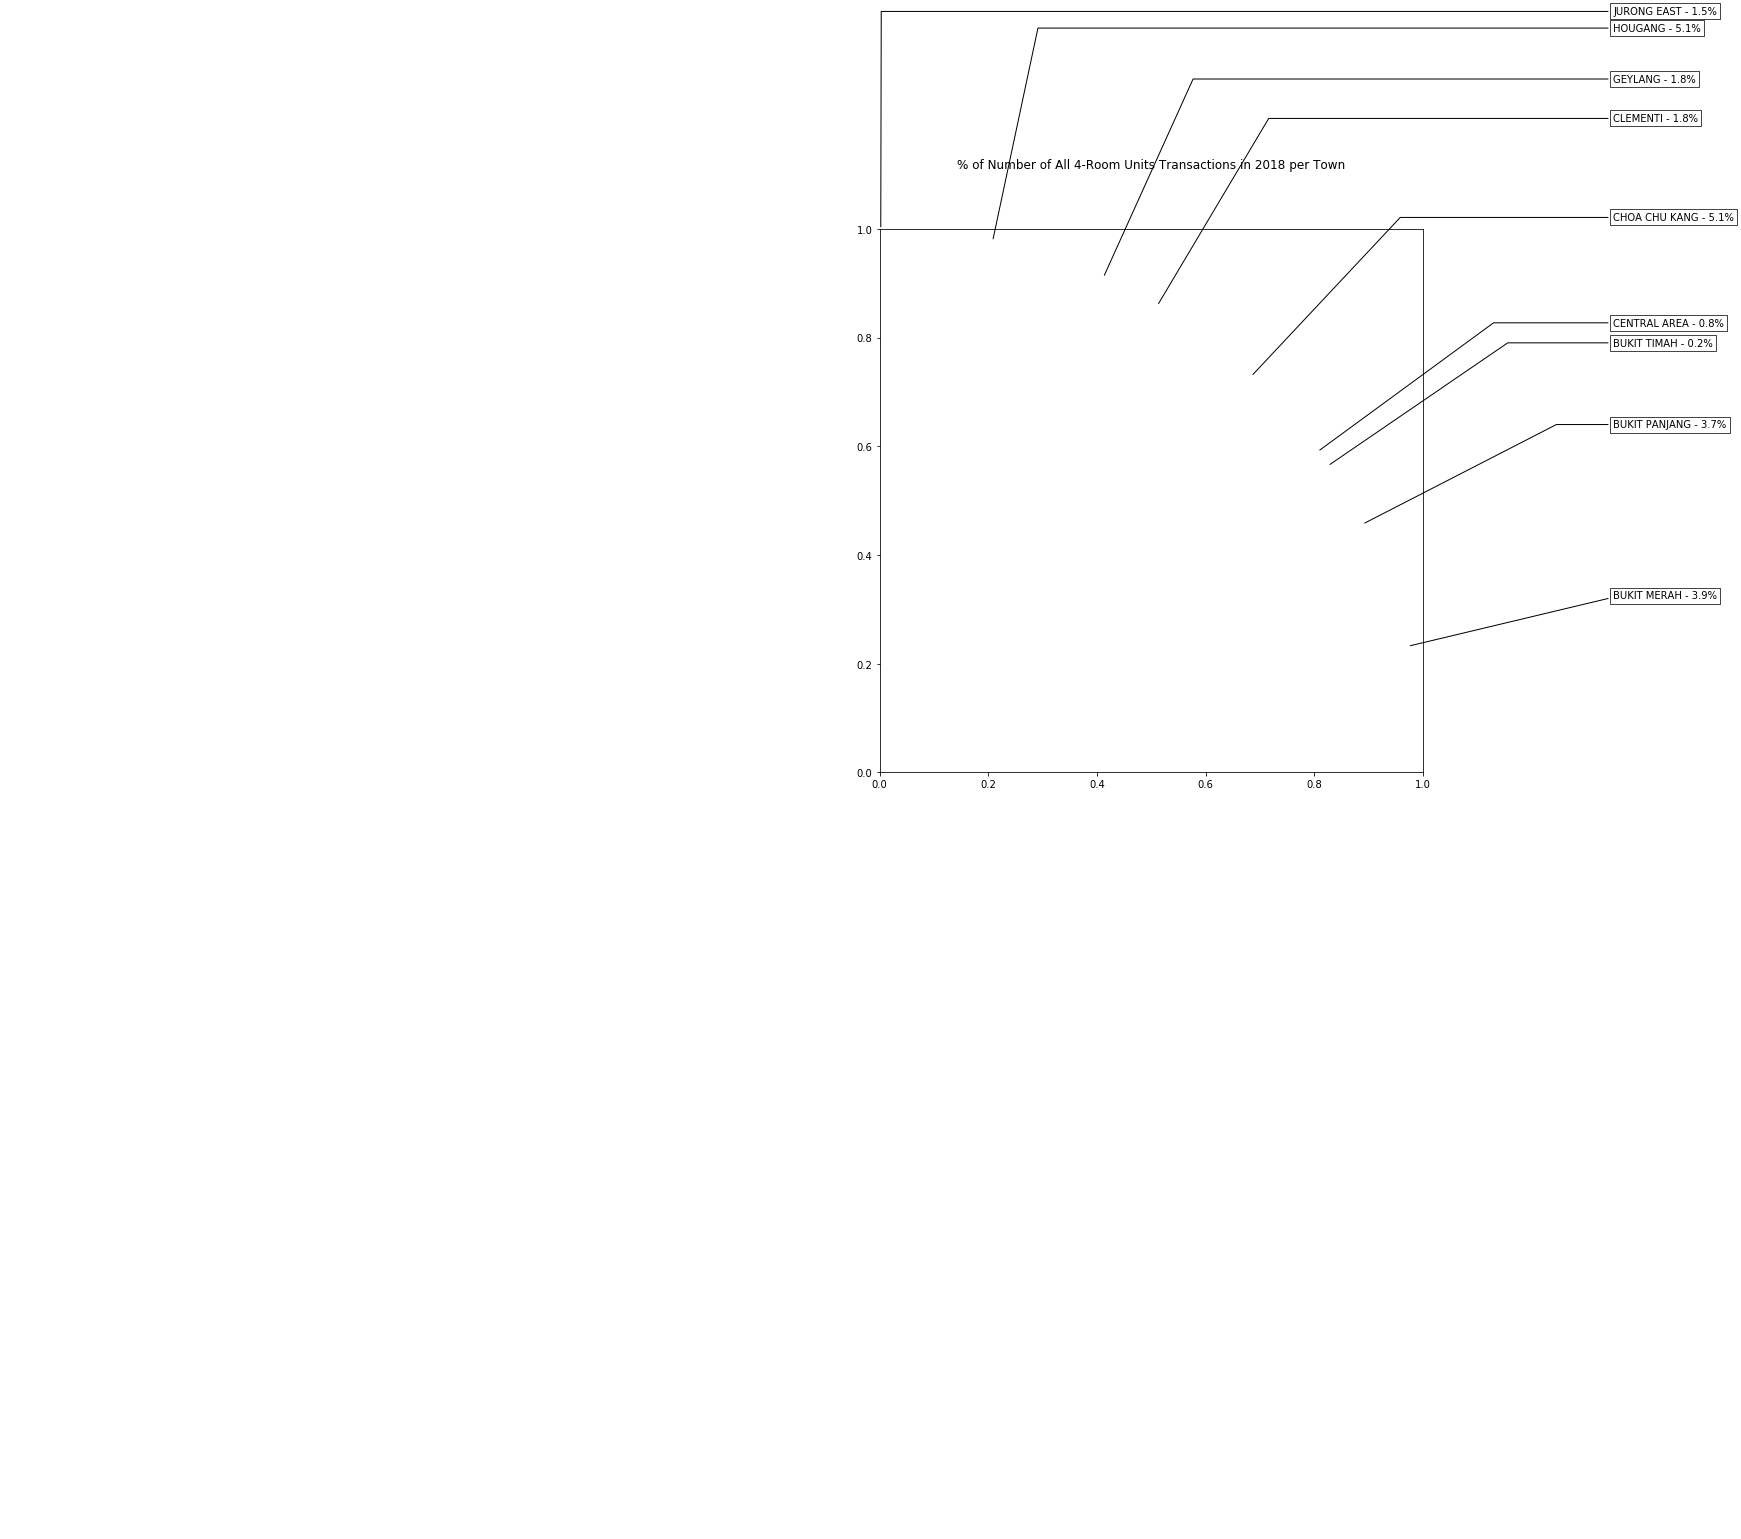

In [25]:
listp = [] # list for all transactional prices per town
listt = [] # list for all towns
listl = [] # list for the number of transactions per town
listw = [] # list for wording in donut - show town and percentage of all transactions in 2018

# print('Total number of 4-room resale units transactions in 2018: {}'.format(len(resaledata2018)))
# print('')

for x in np.unique(resaledata2018['town']):
    resdata = resaledata2018[[i for i, v in enumerate(resaledata2018['town']) if x in v]]
#     print('There is {} number of transactions of 4-room resale units in {}, {:.1f}% of all available transactions in 2018.'
#           .format(len(resdata), x, (len(resdata)/len(resaledata2018))*100))

    listp.append(resdata['resale_price'])
    listt.append(x)
    listl.append(len(resdata))
    listw.append(str(x)+' - '+str(round((len(resdata)/len(resaledata2018))*100,1))+'%')

# donut plot
fig, ax = plt.subplots(figsize=(16,10), subplot_kw = dict(aspect='equal'))
# wedges, texts = ax.pie(listl, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle='square, pad=0.3', fc='w', ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va='center')
for i, p  in enumerate(wedges):
    print(p)
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1:'left'}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(listw[i], xy=(x,y), xytext=(1.35*np.sign(x), 1.4*y),
                   horizontalalignment=horizontalalignment, **kw)
    
# title at y=1.1 so to avoid being overlapped
ax.set_title('% of Number of All 4-Room Units Transactions in 2018 per Town', y=1.1);